Basé sur la vidéo : https://www.youtube.com/watch?v=bte8Er0QhDg

In [71]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [81]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [82]:
# You can either run this cell or the next one which loads the model already trained

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

model.save('handwritten.model')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9218
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1058 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0749 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0322 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0247 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

INFO:tensorflow:Assets written to: handwritten.model/assets


In [83]:
# Run this cell if the previous one hadn't 

model = tf.keras.models.load_model('handwritten.model')

In [84]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0999 - accuracy: 0.9768


1/1 [==============================] - 0s 44ms/step


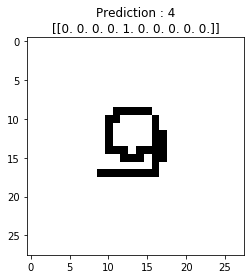

1/1 [==============================] - 0s 16ms/step


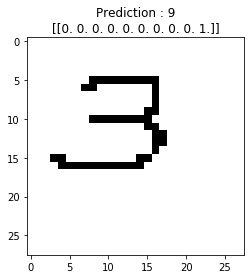

1/1 [==============================] - 0s 16ms/step


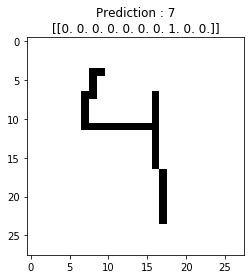

1/1 [==============================] - 0s 19ms/step


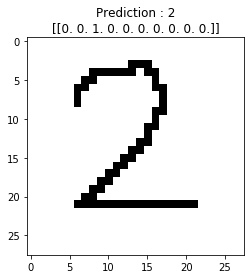

1/1 [==============================] - 0s 19ms/step


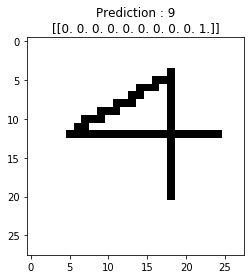

1/1 [==============================] - 0s 23ms/step


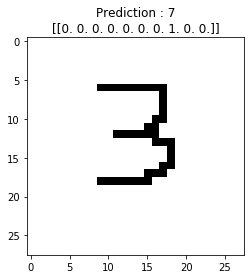

1/1 [==============================] - 0s 18ms/step


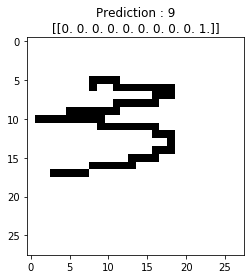

1/1 [==============================] - 0s 20ms/step


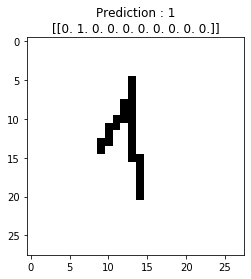

1/1 [==============================] - 0s 18ms/step


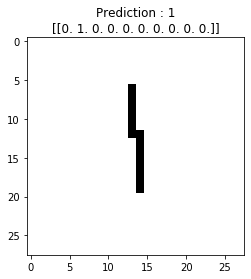

1/1 [==============================] - 0s 22ms/step


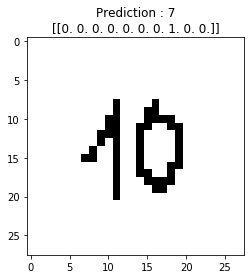

1/1 [==============================] - 0s 17ms/step


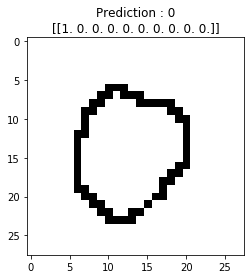

In [85]:
cpt = 1
while os.path.isfile(f"chiffres/chiffre{cpt}.png"):
    img = cv2.imread(f"chiffres/chiffre{cpt}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.title(f"Prediction : {np.argmax(prediction)}\n{prediction}")
    plt.show()
    cpt += 1